Cr: [Loading data in yt: Can we make it better? by Matthew Turk](https://matthewturk.github.io/post/loading_data_in_yt/)

In [1]:
import h5py
import yt
import numpy as np
import collections

In [2]:
f = h5py.File("/Users/yilinxia/Desktop/DXL/yt/chimera_000661800_grid_1_01.h5", "r")
# dataset can be donwloaded here http://use.yt/upload/6b106447

# Exploration

In exploration part, we aim to find out the dims and corresponding field

### Key Explorations

In [3]:
f.keys()

<KeysViewHDF5 ['abundance', 'analysis', 'fluid', 'mesh', 'metadata', 'radiation', 'tracking']>

In [4]:
f["/mesh"].keys()

<KeysViewHDF5 ['array_dimensions', 'cycle', 'd_omega', 'dx_cf', 'dy_cf', 'dz_cf', 'i_frame', 'last_frame', 'my_hyperslab_group', 'nz_hyperslabs', 'ongrid_mask', 'phi_index_bound', 'r_comv', 'radial_index_bound', 't_bounce', 'theta_index_bound', 'time', 'time_steps', 'x_cf', 'x_ef', 'y_cf', 'y_ef', 'z_cf', 'z_ef']>

In [5]:
dims = f["/mesh/array_dimensions"][()]
xgrid, ygrid, zgrid = (f["/mesh/{}_ef".format(ax)][()] for ax in 'xyz')

In [6]:
xgrid.shape, ygrid.shape, zgrid.shape, dims

((723,), (241,), (2,), array([722, 240,   1], dtype=int32))

In [7]:
f["/fluid"].keys()

<KeysViewHDF5 ['LScompress', 'agr_c', 'agr_e', 'c_eos_i', 'dimeos', 'dudt_nu', 'dudt_nuc', 'e_int', 'entropy', 'eos_rho', 'grav_x_c', 'grav_y_c', 'grav_z_c', 'press', 'rho_c', 't_c', 'u_c', 'v_c', 'v_csound', 'wBVMD', 'w_c', 'ye_c', 'ylep']>

### Attributes Exploration

In [8]:
f.attrs.keys()

<KeysViewHDF5 []>

# Construction

### Field Match

In [9]:
collections.Counter(f["/fluid"][v].shape for v in f["/fluid"])

Counter({(): 1, (722,): 1, (723,): 1, (1,): 2, (2,): 1, (1, 240, 722): 17})

In [10]:
data = {n: v[()].T for n, v in f["/fluid"].items() if v.shape == tuple(dims[::-1])}
data.keys()

dict_keys(['dudt_nu', 'dudt_nuc', 'e_int', 'entropy', 'grav_x_c', 'grav_y_c', 'grav_z_c', 'press', 'rho_c', 't_c', 'u_c', 'v_c', 'v_csound', 'wBVMD', 'w_c', 'ye_c', 'ylep'])

In [11]:
data['e_int'].shape

(722, 240, 1)

### Mesh Structure

In [12]:
coord, conn = yt.hexahedral_connectivity(xgrid, ygrid, zgrid)

In [13]:
coord.shape

(348486, 3)

In [14]:
conn.shape

(173280, 8)

In [15]:
bbox = np.array([
    [xgrid.min(), xgrid.max()],
    [ygrid.min(), ygrid.max()],
    [zgrid.min(), zgrid.max()]
])

### Data Transform

In [16]:
ds = yt.load_hexahedral_mesh(data, conn, coord, bbox = bbox, geometry = ("spherical", ('r', 'theta', 'phi')))

yt : [INFO     ] 2022-05-11 09:53:28,201 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-11 09:53:28,203 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-05-11 09:53:28,205 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-11 09:53:28,207 Parameters: domain_right_edge         = [7.70275059e+09 3.14159265e+00 6.28318531e+00]
yt : [INFO     ] 2022-05-11 09:53:28,208 Parameters: cosmological_simulation   = 0


In [17]:
ds.field_list

[('stream', 'dudt_nu'),
 ('stream', 'dudt_nuc'),
 ('stream', 'e_int'),
 ('stream', 'entropy'),
 ('stream', 'grav_x_c'),
 ('stream', 'grav_y_c'),
 ('stream', 'grav_z_c'),
 ('stream', 'press'),
 ('stream', 'rho_c'),
 ('stream', 't_c'),
 ('stream', 'u_c'),
 ('stream', 'v_c'),
 ('stream', 'v_csound'),
 ('stream', 'wBVMD'),
 ('stream', 'w_c'),
 ('stream', 'ye_c'),
 ('stream', 'ylep')]

In [18]:
ds.derived_field_list

[('gas', 'cell_volume'),
 ('gas', 'dphi'),
 ('gas', 'dr'),
 ('gas', 'dtheta'),
 ('gas', 'path_element_phi'),
 ('gas', 'path_element_r'),
 ('gas', 'path_element_theta'),
 ('gas', 'phi'),
 ('gas', 'r'),
 ('gas', 'theta'),
 ('gas', 'volume'),
 ('index', 'cell_volume'),
 ('index', 'dphi'),
 ('index', 'dr'),
 ('index', 'dtheta'),
 ('index', 'grid_indices'),
 ('index', 'grid_level'),
 ('index', 'ones'),
 ('index', 'path_element_phi'),
 ('index', 'path_element_r'),
 ('index', 'path_element_theta'),
 ('index', 'phi'),
 ('index', 'r'),
 ('index', 'theta'),
 ('index', 'virial_radius_fraction'),
 ('index', 'volume'),
 ('index', 'zeros'),
 ('stream', 'cell_volume'),
 ('stream', 'dphi'),
 ('stream', 'dr'),
 ('stream', 'dtheta'),
 ('stream', 'dudt_nu'),
 ('stream', 'dudt_nuc'),
 ('stream', 'e_int'),
 ('stream', 'entropy'),
 ('stream', 'grav_x_c'),
 ('stream', 'grav_y_c'),
 ('stream', 'grav_z_c'),
 ('stream', 'path_element_phi'),
 ('stream', 'path_element_r'),
 ('stream', 'path_element_theta'),
 ('st

# Visualization

yt : [INFO     ] 2022-05-11 09:53:28,361 Setting origin='native' for spherical geometry.
yt : [INFO     ] 2022-05-11 09:53:28,378 xlim = 0.000000 7702750588.209774
yt : [INFO     ] 2022-05-11 09:53:28,379 ylim = -7702750588.209774 7702750588.209774
yt : [INFO     ] 2022-05-11 09:53:28,381 xlim = 0.000000 7702750588.209774
yt : [INFO     ] 2022-05-11 09:53:28,381 ylim = -7702750588.209774 7702750588.209774
yt : [INFO     ] 2022-05-11 09:53:28,383 Making a fixed resolution buffer of (('stream', 'e_int')) 800 by 800



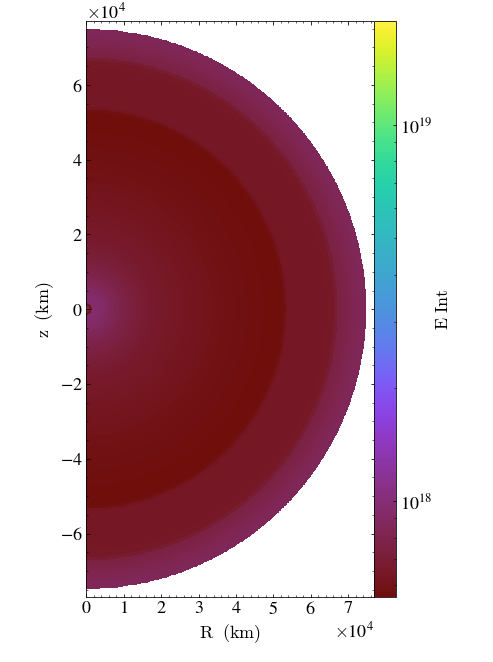

In [19]:
s = yt.SlicePlot(ds, "phi", ('stream','e_int'))
s.show()

yt : [INFO     ] 2022-05-11 09:53:29,316 xlim = -3851375294.104887 3851375294.104887
yt : [INFO     ] 2022-05-11 09:53:29,317 ylim = -7702750588.209774 7702750588.209774
yt : [INFO     ] 2022-05-11 09:53:29,322 Making a fixed resolution buffer of (('stream', 'e_int')) 800 by 800



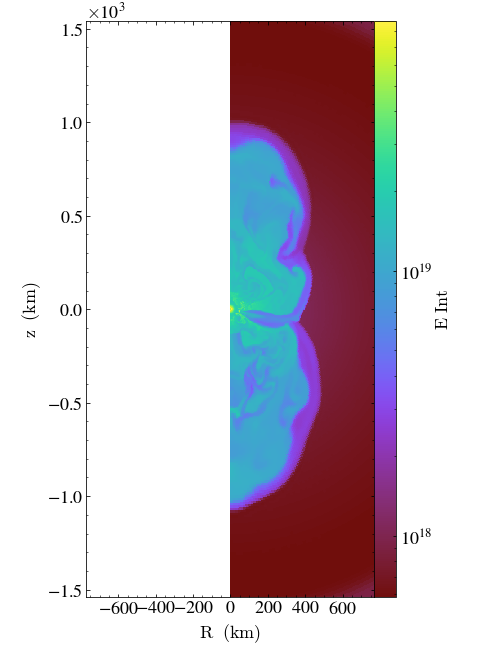

In [20]:
s.set_center( (0.0, 0.0) )
s.zoom(50)

yt : [INFO     ] 2022-05-11 09:53:29,801 xlim = -77027505.882098 77027505.882098
yt : [INFO     ] 2022-05-11 09:53:29,802 ylim = -154055011.764195 154055011.764195
yt : [INFO     ] 2022-05-11 09:53:29,808 Making a fixed resolution buffer of (('stream', 'e_int')) 800 by 800



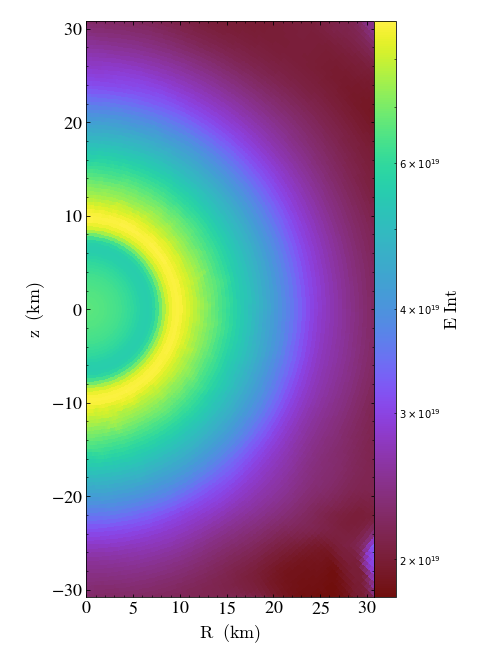

In [21]:
s.set_center( (0.0, 0.0) )
s.zoom(50)
s.pan_rel((0.5, 0.0))